In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
plt.style.use('fivethirtyeight')

# A moving reference frame with conservation of angular momentum

![rolling table with a spring-mass system attached to its center](./images/rolling-table.svg)

A mass is connected to a spring on top of a table. The system is at rest with the spring unstretched oriented towards the top of the table, $\theta(t=0) = 90^o$. 

Then, the table is pushed so it has a constant velocity of $v_0$. The mass was not pushed, so its initial velocity realtive to ground is $\bar{0}$

$v_{P/O} = \bar{0} = v_O\hat{i} +v_{P/O'} \rightarrow v_{P/O'} = -v_0 \hat{i}$

The table is moving at a constant speed and does not rotate. It is an __inertial reference frame__. You can apply Newton's second law to the global coordinate system _or_ the moving table coordinate system. This notebook predicts the motion of the point $P$ after the table is pushed for

- $k = 16~N/m$ _spring constant_
- $m = 0.1~kg$ _mass of object at point P_
- $L_0 = 0.1$ _unstretched spring length_
- $v_0 = 1~m/s$ _speed of the moving table_
- $r_0 = L_0$ _initial position of mass is $\mathbf{r} = r_0\hat{e}_r$ where $\hat{e}_r = 1\hat{j}$_
- $\dot{\theta}_0 = \frac{v_0}{r_0}$ _initial angular velocity_

## Conservation of angular momentum in a moving system

The spring does not create any moment on the system, so the angular momentum is constant. 

$\sum M_{O'} = 0 = \frac{d}{dt}\bar{h}_{O'}$

$h_{O'} = \mathbf{r}_{P/O'}\times m \mathbf{v}_{P/O'}$

$h_{O'} = mr^2\dot{\theta} = constant$

## Conservation of energy in moving system

Ignoring friction and drag, you have a system with kinetic and potential energy, $T~and~V$, respectively. There are no nonconservative forces acting on the system.

- $T = \frac{1}{2}mv^2 = \frac{m}{2}(\dot{r}^2 + r^2\dot{\theta}^2)$
- $V = \frac{1}{2}k(r-l_0)^2$


$T_1 + V_1 = T(t) + V(t)$

$\frac{m}{2}(\dot{r_0}^2 + r^2\dot{\theta}_0^2) + \frac{1}{2}k(r_0-l_0)^2 = \frac{m}{2}(\dot{r}^2 + r^2\dot{\theta}^2) + \frac{1}{2}k(r-l_0)^2$

## Create equation of motion and substitute $\theta(t)$ for $f(r)$

The conservation of angular momentum creates a relation between $\dot{\theta}~and~r$ as such, 

$\dot{\theta} = \frac{r_0^2\dot{\theta}_0}{r^2}$

You can plug this into  the conservation of energy equation as such, 

$\frac{m}{2}(\dot{r_0}^2 + r^2\dot{\theta}_0^2) + \frac{1}{2}k(r_0-l_0)^2 = 
\frac{m}{2}\left(\dot{r}^2 + r^2\left(\frac{r_0^2\dot{\theta}_0}{r^2}\right)^2\right) + \frac{1}{2}k(r-l_0)^2$

but, you're still left with two unknowns on the right-hand-side $r~and~\dot{r}$. What you have now is a relationship between distance from origin, $r$, and its speed, $\dot{r}$. If you want to know maximum or minimum distances, $r_{max}~or~r_{min}$, set $\dot{r}=0$ and solve the quadratic equation.

Here, you want to know the motion of the system, so you create the __equations of motion__ from Newton's second law, 

- $\sum F_r = -k(r - l_0) = m(\ddot{r} - r\dot{\theta}^2)$
- $\sum F_\theta = 0 = m(r\ddot{\theta} + 2 \dot{r}\dot{\theta})$

Plugging in $\dot{\theta}^2 = \left(\frac{r_0^2\dot{\theta}_0}{r^2}\right)^2$ to the $\sum F_r$, you are left with one second order differential equation that describes $\ddot{r} = f(r)$

$\ddot{r} = -\frac{k}{m}(r-l_0) + \frac{(r_0^2\dot{\theta}_0)^2}{r^3}$

## Solving for the position of the point $P$

Now, you have one second order differential equation and one function for $\dot{\theta} = f(r)$. The position of the point $P$, $\mathbf{r}_{P/O'} = r\hat{e}_r = r(\cos\theta \hat{i} + \sin\theta \hat{j})$. So you can solve for $r~and~theta$ in 3 steps

1. integrate the second order ODE to find $r(t)$
2. plug in $r(t)$ into $\dot{\theta} = f(r)$ to find $\dot{\theta}$
3. sum the $\dot{\theta}dt$ values to find $\theta(t)$ and animate the path of the point $P$ as $r\cos\theta-vs-r\sin\theta$ 

### 1. integrate the second order ODE

Here, you define the ODE as a function that accepts the time, `t`, and state, `y` $=[r,~\dot{r}]$, and returns the derivatives, `dy` $=\dot{y} = [\dot{r},~\ddot{r}]$. 

In [169]:
def table_ode(t, y, dtheta0 = 10, r0 = 0.2, k = 16, m = 0.1, L0 = 0.1):
    dy = np.zeros(np.shape(y))
    dy[0] = y[1]
    dy[1] = -k/m*(y[0]-L0) + r0**4*dtheta0**2/y[0]**3
    return dy


Use the `solve_ivp` to integrate the ODE for 2 seconds, then plot $r(t)$. 

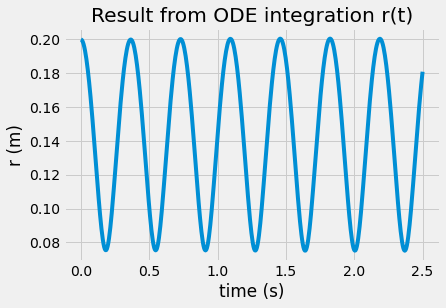

In [190]:
tmax = 2.5

L0 = 0.1
r0 = L0
v0 = 1
dtheta0 = v0/r0
sol = solve_ivp(lambda t, y: table_ode(t, y, r0 = r0, dtheta0 = dtheta0, L0 = L0), 
                [0, tmax], [0.2, 0], t_eval = np.linspace(0, tmax, 500))

r = sol.y[0] # radial position is r = y[0]

plt.plot(sol.t, r)
plt.title('Result from ODE integration r(t)')
plt.xlabel('time (s)')
plt.ylabel('r (m)');

### 2. plug in $r(t)$ into $\dot{\theta} = f(r)$ to find $\dot{\theta}$

The angular momentum is conserved, so if $r$ decreases, $\dot{\theta}$ increases. Here, you plot the angular speed of the point $P$, $\dot{\theta}$. 

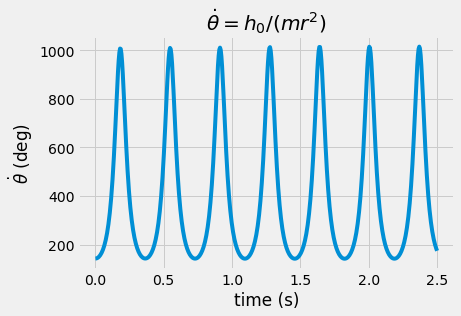

In [171]:
dtheta = dtheta0*r0**2/sol.y[0]**2
plt.plot(sol.t, dtheta*180/np.pi)
plt.title(r'$\dot{\theta} = h_0/(mr^2)$')
plt.xlabel('time (s)')
plt.ylabel(r'$\dot{\theta}$ (deg)');

### 3. sum the $\dot{\theta}dt$ values to find $\theta(t)$ and animate the path of the point $P$

The position is $r_{P/O'} = r(\cos\theta \hat{i} + \sin \theta \hat{j})$. The angle, $\theta(t) = \int_0^t \dot{\theta}dt = \sum_0^i \dot{\theta}(t_i)dt$. Here, you use the `np.cumsum` to calculate the integral of the angular velocity and find angle.  

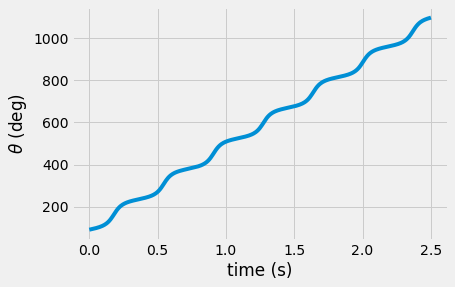

In [172]:
theta = np.pi/2 + np.cumsum(dtheta*sol.t[1])
plt.plot(sol.t, theta*180/np.pi)
plt.xlabel('time (s)')
plt.ylabel(r'$\theta$ (deg)');

Now, you have $r(t)$ and $\theta(t)$, so you can plot the path of the point $P$. 

array([-0.21342708,  0.20792664, -0.19468585,  0.21877813])

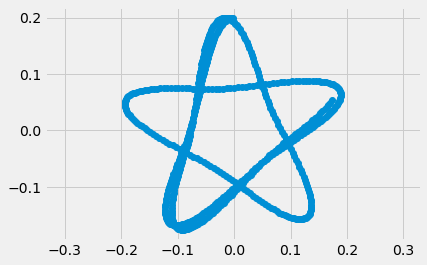

In [173]:
xp = r*np.cos(theta)
yp = r*np.sin(theta)

plt.plot(xp, yp, 'o-')
ax_lims = np.array(plt.axis('equal'))
ax_lims

__Now__, you can animate the results and watch the the object move on the table. 

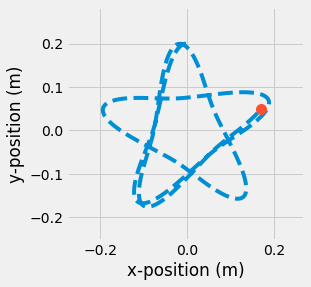

In [189]:
from matplotlib import animation
from IPython.display import HTML

fig, ax = plt.subplots()

ax.axis(ax_lims*1.3)
ax.set_aspect('equal')

ax.set_xlabel('x-position (m)')
ax.set_ylabel('y-position (m)')

line, = ax.plot([], [], '--')
marker, = ax.plot([], [], 'o', markersize=10)

# 2. Create an initializing (`init`) function that clears the previous line and marker

def init():
    line.set_data([], [])
    marker.set_data([], [])
    return (line,marker,)

# 3. Create an animating (`animate`) function that updates the line

def animate(i):
    '''function that updates the line and marker data
    arguments:
    ----------
    i: index of timestep
    outputs:
    --------
    line: the line object plotted in the above ax.plot(...)
    marker: the marker for the end of the 2-bar linkage plotted above with ax.plot('...','o')'''
    line.set_data(xp[:i], yp[:i])
    marker.set_data([xp[i-1], yp[i-1]])
    return (line, marker, )

# 4. Create an animation (`anim`) variable using the `animation.FuncAnimation`

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=range(0,len(sol.t)), interval=30, 
                               blit=True)

HTML(anim.to_html5_video())

## Wrapping up

In this notebook, you used conservation of angular momentum and Newton's
second law to create an equation of motion for the radius of a
spring-mass system on a moving table. Then, you plotted the results and
watched the path of the object as the table slides along the floor. 

_Next steps_:
- What happens if you change the parameters of the system,
  $k,~L0,~etc.$?
- What happens if you change the speed of the table?
- How would you incorporate _friction_ into the analysis?